In [78]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [79]:
Zoo_data = pd.read_csv('Zoo.csv')
Zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [80]:
le = LabelEncoder()
Zoo_data['animal name']
Zoo_data['encoded_animal_name'] = le.fit_transform(Zoo_data['animal name'])

In [81]:
Zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,encoded_animal_name
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,3
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,95
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,96
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,97
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,98


In [82]:
X = Zoo_data.drop(columns=['animal name','type'])
Y = Zoo_data['type']

In [83]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,encoded_animal_name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,3
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,95
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,96
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,97
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,98


In [84]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [85]:
#Grid Screech
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

C:\Users\AkashMY\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.4057142857142857
{'n_neighbors': 19}


C:\Users\AkashMY\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\AkashMY\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\AkashMY\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\AkashMY\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The leas

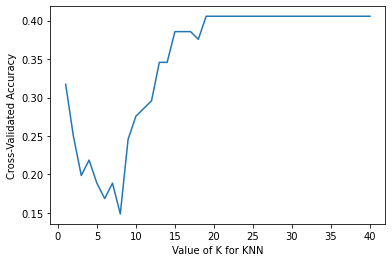

In [86]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [96]:
# considering K values as 19 & K-fold as 5
num_folds = 2
kfold = KFold(n_splits=num_folds)

# Build the Moddel 
model = KNeighborsClassifier(n_neighbors=19)
results = cross_val_score(model, X, Y, cv=kfold)
results


array([0.47058824, 0.34      ])

In [97]:
results.mean()

0.4052941176470588

In [98]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=19)

In [99]:
Y_predicted = model.predict(X)
Zoo_data['Y_predicted'] = pd.Series(Y_predicted)

In [100]:
confusion_matrix(Y,Zoo_data['Y_predicted'])

array([[40,  1,  0,  0,  0,  0,  0],
       [17,  3,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0],
       [11,  2,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0],
       [ 8,  2,  0,  0,  0,  0,  0]], dtype=int64)

In [101]:
Zoo_data['Y_predicted'].unique()

array([1, 2], dtype=int64)

In [102]:
Y.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)